# Introduction

 blah blah

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import folium

In [73]:
! ls -lrt

total 176
-rw-r--r-- 1 rafael rafael  25879 dez  2  2020  lisbon-houses.csv
-rw-r--r-- 1 rafael rafael    337 nov  1 18:29  README.md
-rw-r--r-- 1 rafael rafael     41 nov 24 21:12  token.txt
-rw-r--r-- 1 rafael rafael 142770 nov 24 22:13 'Project - Lisbon House Prices.ipynb'


In [21]:
df_raw= pd.read_csv('lisbon-houses.csv')

In [22]:
df_raw.dtypes

Id                   int64
Condition           object
PropertyType        object
PropertySubType     object
Bedrooms             int64
Bathrooms            int64
AreaNet              int64
AreaGross            int64
Parking              int64
Latitude           float64
Longitude          float64
Country             object
District            object
Municipality        object
Parish              object
Price M2             int64
Price                int64
dtype: object

In [23]:
df = df_raw.convert_dtypes()
df.dtypes

Id                   Int64
Condition           string
PropertyType        string
PropertySubType     string
Bedrooms             Int64
Bathrooms            Int64
AreaNet              Int64
AreaGross            Int64
Parking              Int64
Latitude           Float64
Longitude          Float64
Country             string
District            string
Municipality        string
Parish              string
Price M2             Int64
Price                Int64
dtype: object

In [24]:


numerical_feats = df.dtypes[df.dtypes != "string"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "string"].index
print("Number of Categorical features: ", len(categorical_feats))



Number of Numerical features:  10
Number of Categorical features:  7


In [25]:
df

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.164,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,For Refurbishment,Homes,Apartment,2,1,66,132,0,38.746,-9.1769,Portugal,Lisboa,Lisboa,Benfica,2727,196500
242,347,For Refurbishment,Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Portugal,Lisboa,Lisboa,Santa Maria Maior,4807,245000
243,348,For Refurbishment,Single Habitation,Townhouse Dwelling,2,1,90,180,0,38.7694,-9.1138,Portugal,Lisboa,Lisboa,Olivais,2463,486000
244,349,For Refurbishment,Single Habitation,Dwelling,4,3,121,242,0,38.703,-9.2044,Portugal,Lisboa,Lisboa,Belem,3542,375000


Our dataset has a total of 17 columns and each column has 246 observations.

Columns:

  * **Id**: is a unique identifying number assigned to each house.
  * **Condition**: The house condition (i.e., New, Used, As New, For Refurbishment).
  * **PropertyType**: Property type (i.e., Home, Single habitation)
  * **PropertySubType**: Property Sub Type (i.e., Apartment, duplex, etc.)
  * **Bedrooms**: Number of Bedrooms
  * **Bathrooms**: Number of Bathrooms
  * **AreaNet**:Net area of the house
  * **AreaGross**: Gross area of the house
  * **Parking**: Number of parking places
  * **Latitude**: Geographical Latitude
  * **Longitude**: Geographical Longitude
  * **Country**: Country where the house is located
  * **District**: District where the house is located
  * **Municipality**: Municipality where the house is located
  * **Parish**: Parish where the house is located
  * **Price M2**: Price per m² in the location of the house
  * **Price**: This is our training variable and target. It is the home price



In [26]:
df.columns

Index(['Id', 'Condition', 'PropertyType', 'PropertySubType', 'Bedrooms',
       'Bathrooms', 'AreaNet', 'AreaGross', 'Parking', 'Latitude', 'Longitude',
       'Country', 'District', 'Municipality', 'Parish', 'Price M2', 'Price'],
      dtype='object')

In [27]:
df = df.drop(['Country', 'District','Municipality'], axis=1)

In [28]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,246.0,NaN,NaN,NaN,226.670732,72.308419,101.0,166.25,227.5,288.75,350.0
Condition,246,4,New,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyType,246,2,Homes,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertySubType,246,8,Apartment,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,246.0,NaN,NaN,NaN,2.49187,1.354484,0.0,2.0,2.0,3.0,11.0
Bathrooms,246.0,NaN,NaN,NaN,1.845528,1.034369,0.0,1.0,2.0,2.0,6.0
AreaNet,246.0,NaN,NaN,NaN,109.662602,66.261664,23.0,64.25,90.0,145.0,573.0
AreaGross,246.0,NaN,NaN,NaN,219.325203,132.523328,46.0,128.5,180.0,290.0,1146.0
Parking,246.0,NaN,NaN,NaN,0.154472,0.503579,0.0,0.0,0.0,0.0,3.0
Latitude,246.0,NaN,NaN,NaN,38.733106,0.020778,38.6963,38.7169,38.73005,38.7458,38.7899


In [29]:
total = df.isnull().sum().sort_values(ascending=False)
total.name = "Total Nulls"
total.to_frame()

,Total Nulls
Id,0
Condition,0
PropertyType,0
PropertySubType,0
Bedrooms,0
Bathrooms,0
AreaNet,0
AreaGross,0
Parking,0
Latitude,0


# Exploratory Data Analysis

blah blah

### Number of Houses per condition state:

New                  96
As New               54
Used                 51
For Refurbishment    45
Name: Condition, dtype: Int64


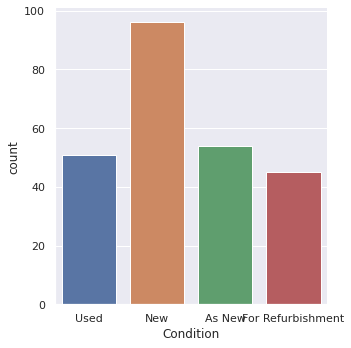

In [30]:
sn.set()
print(df['Condition'].value_counts())
sn.catplot(x="Condition", kind="count", data=df);

Homes                239
Single Habitation      7
Name: PropertyType, dtype: Int64


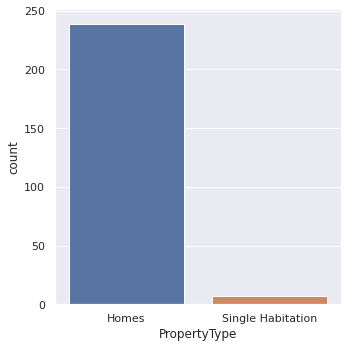

In [31]:
print(df['PropertyType'].value_counts())
sn.catplot(x="PropertyType", kind="count", data=df);

Apartment             226
Duplex                  9
Townhouse Dwelling      4
Dwelling                2
Studio                  2
Isolated Villa          1
Penthouse               1
Apart Hotel             1
Name: PropertySubType, dtype: Int64


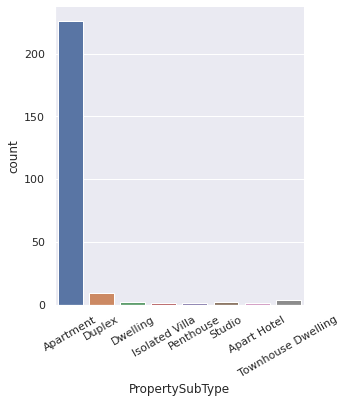

In [32]:
print(df['PropertySubType'].value_counts())
g = sn.catplot(x="PropertySubType", kind="count", data=df)
g.set_xticklabels(rotation=30)

Marvila                    51
Campo de Ourique           23
Estrela                    17
Santa Maria Maior          17
Arroios                    16
Sao Vicente                14
Penha de Franca            12
Olivais                    11
Belem                      11
Alvalade                    8
Avenidas Novas              8
Parque das Nacoes           8
Santo Antonio               8
Lumiar                      7
Campolide                   6
Sao Domingos de Benfica     6
Benfica                     5
Ajuda                       5
Misericordia                4
Alcantara                   3
Santa Clara                 2
Carnide                     2
Areeiro                     1
Beato                       1
Name: Parish, dtype: Int64


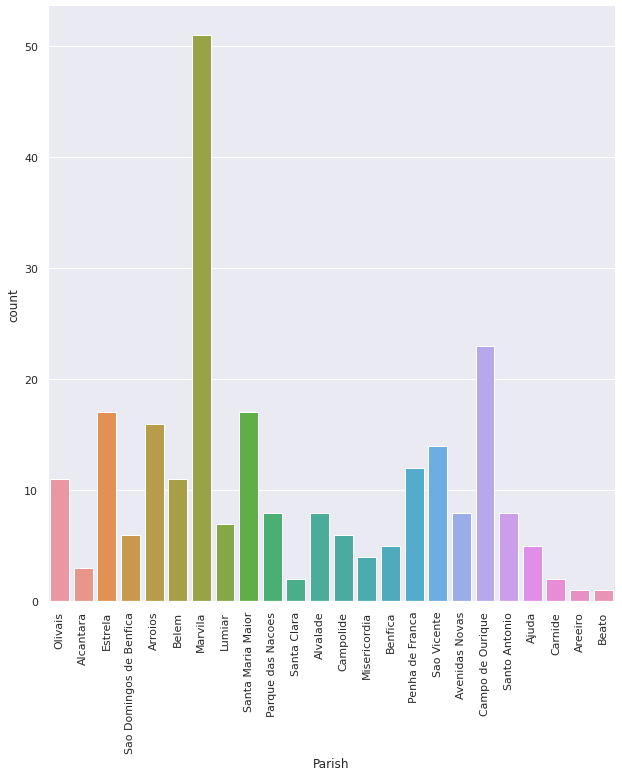

In [33]:
print(df['Parish'].value_counts())
g = sn.catplot(x="Parish", kind="count", data=df)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,10)

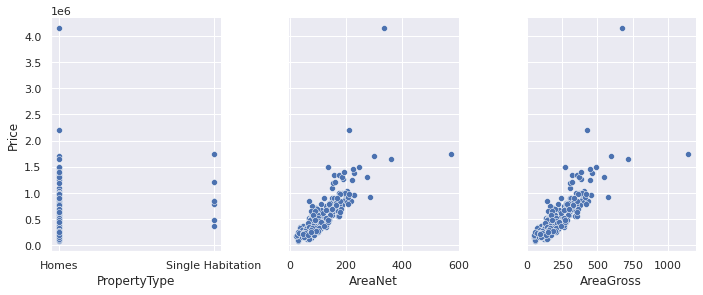

In [34]:
df_plot = df[["Price", "PropertyType", "AreaNet", 
                  "AreaGross"]]

g = sn.pairplot(data=df_plot, y_vars=['Price'], x_vars=df_plot.columns[1:4])
g.tight_layout()
g.fig.set_size_inches(10,5)

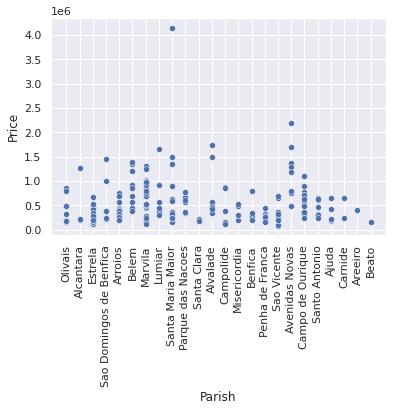

In [35]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Parish'], )
g.tick_params(axis='x', rotation=90)

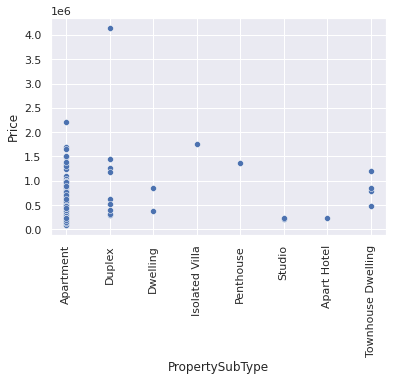

In [36]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['PropertySubType'], )
g.tick_params(axis='x', rotation=90)

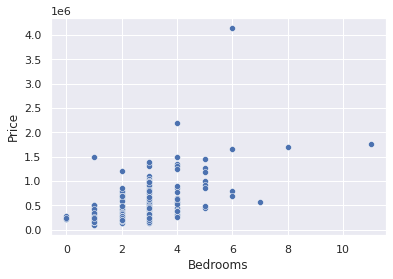

In [37]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Bedrooms'], )

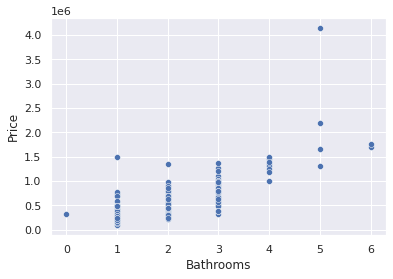

In [38]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Bathrooms'], )


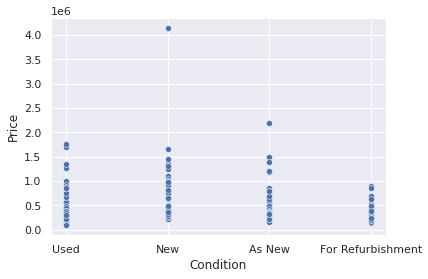

In [39]:
g = sn.scatterplot(data=df, y=df['Price'], x=df['Condition'] )

Skewness: 3.310139
Kurtosis: 21.700172


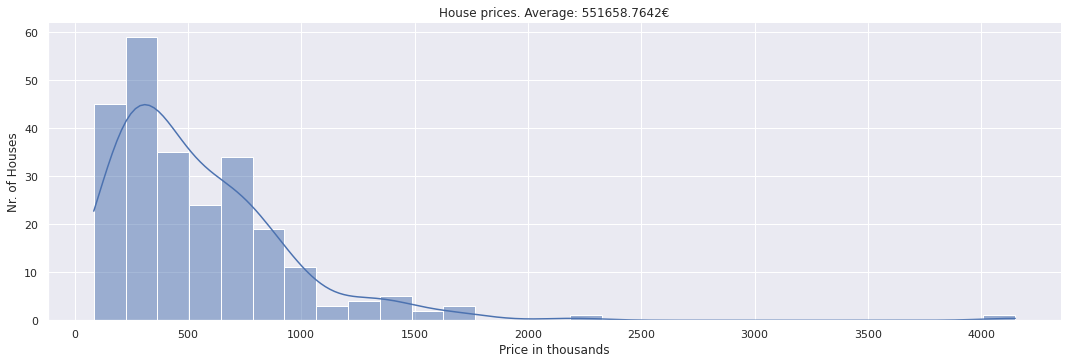

In [40]:

sn.displot(df['Price']/1e3, 
            aspect=3,
            kde=True)

plt.title(f'House prices. Average: {round(df.Price.mean(),4)}€')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Houses')

print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

plt.show()

Skewness: 0.067164
Kurtosis: -0.289183


/home/rafael/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


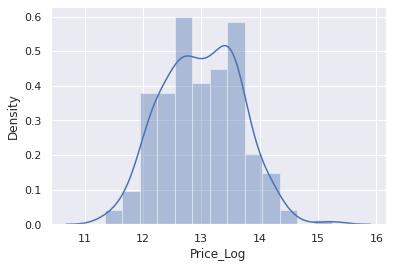

In [41]:
df['Price_Log'] = np.log(df['Price'])

sn.distplot(df['Price_Log']);
# skewness and kurtosis
print("Skewness: %f" % df['Price_Log'].skew())
print("Kurtosis: %f" % df['Price_Log'].kurt())



# Map

In [67]:
loc_center = [df['Latitude'].mean(), df['Longitude'].mean()]

map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 12, control_scale=True)

for index, loc in df.iterrows():
    popup = ('Price: {}€\n Property Sub Type: {}\n Net Area: {} m²'
                .format(loc['Price'], loc['PropertySubType'], loc['AreaNet']))
    
    folium.CircleMarker([loc['Latitude'], loc['Longitude']],
                        radius=5, weight=5, popup=popup).add_to(map1)
    
folium.LayerControl().add_to(map1)
map1

In [63]:
df.get(df.Price == df.Price.max())

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Parish,Price M2,Price,Price_Log
144,249,New,Homes,Duplex,6,5,336,672,0,38.7116,-9.1303,Santa Maria Maior,4807,4150000,15.238619
